In [ ]:
import numpy as np
import mrcfile
from matplotlib import pyplot as plt
%matplotlib inline
import collections
import tensorflow as tf
from tensorflow import spectral

In [ ]:
from relion_fixed_it import load_star

In [ ]:
sess = tf.InteractiveSession()
base_path = '/local/scratch/public/sl767/SPA/playing2/'
path=base_path+'Refine3D/1Q9J/1Q9J_mult005_it013_class001_external_reconstruct.star'

In [ ]:
file=load_star(path)

In [ ]:
type(file)

In [ ]:
for key, data in file.items():
    print(key)

In [ ]:
for key, data in file['external_reconstruct_general'].items():
    print(key)
    print(data)

In [ ]:
with mrcfile.open(base_path+file['external_reconstruct_general']['rlnExtReconsDataReal']) as mrc:
    data_real = mrc.data
with mrcfile.open(base_path+file['external_reconstruct_general']['rlnExtReconsDataImag']) as mrc:
    data_im = mrc.data
with mrcfile.open(base_path+file['external_reconstruct_general']['rlnExtReconsWeight']) as mrc:
    kernel = mrc.data

In [ ]:
complex_data = data_real + 1j * data_im

In [ ]:
complex_data.shape

In [ ]:
data = tf.placeholder(shape=(96, 96, 49), dtype=tf.complex64)
ft = spectral.irfft3d(data)

In [ ]:
image = sess.run(ft, feed_dict={data: complex_data})

In [ ]:
image.shape

In [ ]:
plt.imshow(image[...,40])

In [ ]:
plt.imshow(data_real[...,20])

In [ ]:
new_conv = np.fft.fftshift(complex_data, axes=(0, 1))
plt.imshow(np.real(new_conv[...,0]))
plt.clim(-1e7,1e7)

In [ ]:
image = sess.run(ft, feed_dict={data: new_conv})

In [ ]:
plt.imshow(image[...,0])

In [ ]:
image.shape

In [ ]:
new_conv.max()

In [ ]:
with mrcfile.open('/local/scratch/public/sl767/SPA/playing2/1Q9J.mrc') as mrc:
    molecule = mrc.data

In [ ]:
real_inp = tf.placeholder(shape=(96,96,96), dtype=tf.float32)
fourierData = spectral.rfft3d(real_inp)

In [ ]:
plt.imshow(molecule[...,20])

In [ ]:
fou = sess.run(fourierData, feed_dict={real_inp: molecule})

In [ ]:
plt.imshow(np.real(fou[...,20]))

In [ ]:
fou.shape

In [ ]:
plt.imshow(sess.run(ft, feed_dict={data:fou})[...,20])

In [ ]:
plt.imshow(np.real(np.fft.rfftn(molecule)[...,20]))

In [ ]:
plt.imshow(np.fft.fftshift(image)[...,50], clim=(0,600))

In [ ]:
plt.imshow(molecule[...,50], clim=(0,12))

In [ ]:
molecule.max()

In [ ]:
molecule.min()

In [ ]:
np.fft.fftshift(image).max()

In [ ]:
np.fft.fftshift(image).min()

In [ ]:
import odl
from odl.contrib import tensorflow
import numpy as np
import tensorflow as tf

In [ ]:
space = odl.uniform_discr([0, 0, 0], [96, 96 ,96], [96, 96, 96],
                                             dtype='float32')

In [ ]:
class ifftshift_odl(odl.Operator):
    def _call(self, x):
        return space.element(np.fft.ifftshift(x))
    
    def __init__(self):
        super(ifftshift_odl, self).__init__(space, space, linear=True)

class fftshift_odl(odl.Operator):
    def _call(self, x):
        return space.element(np.fft.fftshift(x))
    
    def __init__(self):
        super(fftshift_odl, self).__init__(space, space, linear=True)
        
    @property
    def adjoint(self):
        return ifftshift_odl()
fftshift_tf = odl.contrib.tensorflow.as_tensorflow_layer(fftshift_odl())

In [ ]:
x = np.ones(shape=(96,96,96))
y = fftshift_odl().adjoint(x)

In [ ]:
(ifftshift_odl()(fftshift_odl()(molecule))-molecule).__array__().max()

In [ ]:
fft_tf = odl.contrib.tensorflow.as_tensorflow_layer(fftshift_odl())

In [ ]:
FOURIER_SIZE = (None, 96, 96, 49,1)
t = tf.placeholder(shape=FOURIER_SIZE, dtype=tf.complex64)
y = tf.expand_dims(tf.spectral.irfft3d(t[...,0]), axis=-1)

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
res = sess.run(y, feed_dict={t:np.ones(shape=(5,96,96,96,1))})

In [ ]:
y.shape

In [ ]:
y_sh = fftshift_tf(y)

In [ ]:
y_sh.shape

In [ ]:
conv1 = tf.layers.conv3d(inputs=y, filters=16, kernel_size=[3, 3, 3], padding="same",
                                 activation=tf.nn.relu, reuse=tf.AUTO_REUSE, name='conv1')

In [ ]:
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)

In [ ]:
import numpy as np
import mrcfile 
with mrcfile.open('/local/scratch/public/sl767/SPA/playing2/1Q9J.mrc') as mrc:
    molecule = mrc.data

In [ ]:
x = np.random.uniform(0,1,(96,96,96))
y = np.fft.rfftn(x)

In [ ]:
ft.shape

In [ ]:
mask = np.concatenate((np.ones(shape=(96,96,1)), 2*np.ones(shape=(96,96,47)),np.ones(shape=(96,96,1))), axis=-1)
mask2 = np.concatenate((np.ones(shape=(96,96,1)), 2*np.ones(shape=(96,96,94)),np.ones(shape=(96,96,1))), axis=-1)

In [ ]:
def scal(a,b):
    return np.dot(np.reshape(a, -1), np.conj(np.reshape(b, -1)))

In [ ]:
scal(y,np.multiply(y, mask))/(96*96*96)

In [ ]:
scal(x,x)

In [ ]:
scal(y,np.fft.rfftn(np.multiply(x, mask2)))/(96*96*96)

In [ ]:
import numpy as np
import mrcfile 
with mrcfile.open('/local/scratch/public/sl767/SPA/playing2/1Q9J.mrc') as mrc:
    molecule = mrc.data
molecules = np.ones(shape=(2,96,96,96,1))
molecules[0,...,0]=molecule
from ClassFiles.ut import normalize
from ClassFiles.ut import l2

In [ ]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [ ]:
REAL_SIZE = (None, 96, 96, 96,1)
t = tf.placeholder(shape=REAL_SIZE, dtype=tf.float32)

In [ ]:
norms = tf.sqrt(tf.reduce_sum(tf.square(t), axis=(1,2,3)))
norms_exp = tf.expand_dims(tf.expand_dims(tf.expand_dims(norms, axis=1), axis=1), axis=1)

In [ ]:
norms.shape

In [ ]:
norms_exp.shape

In [ ]:
result = tf.div(t, norms_exp)

In [ ]:
normed = sess.run(result, feed_dict={t: molecules})

In [ ]:
comp = normalize(molecules)

In [ ]:
l2(normed-comp)/l2(comp)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
REAL_SIZE = (None, 96, 96, 96,1)
t = tf.placeholder(shape=REAL_SIZE, dtype=tf.float32)

In [ ]:
y = tf.spectral.rfft3d(t)
phase = 2*np.pi*tf.random_uniform(shape=tf.shape(y), minval= 0, maxval=1)
com_phase = tf.exp(1j*tf.cast(phase, tf.complex64))
y = tf.multiply(com_phase, y)

In [9]:
from ClassFiles import tensorflow_rotations
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
import numpy as np
import scipy.linalg
import mrcfile 
with mrcfile.open('/local/scratch/public/sl767/SPA/playing2/1Q9J.mrc') as mrc:
    molecule = mrc.data
molecules = np.ones(shape=(1,96,96,96,1))
molecules[0,...,0]=molecule
from ClassFiles.ut import l2

In [133]:
rotation_matrix = np.zeros(shape=(3,3))
rotation_matrix[0,0] = 1
rotation_matrix[1,2] = -1
rotation_matrix[2,1] = 1

exponent = 100 * np.random.randn(3, 3)
rotation_matrix = scipy.linalg.expm((exponent - exponent.T) / 2)

In [134]:
rotation_matrix

array([[ 0.62366103, -0.78168705, -0.0035041 ],
       [-0.64708928, -0.51374832, -0.56332772],
       [ 0.43854576,  0.35359301, -0.82622612]])

In [135]:
translation=0.1*np.ones(shape=(3,1))
translation[:]=0

In [136]:
theta = np.concatenate((rotation_matrix, translation), axis=1)

In [137]:
theta = np.expand_dims(theta, 0)

In [138]:
sess = tf.InteractiveSession()

/alt/applic/user-maint/sl767/miniconda3/envs/py3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [139]:
inp = tf.placeholder(shape=(None, 96,96,96,1), dtype=tf.float64)
rotated = tensorflow_rotations.rot3d(inp, theta)

In [140]:
rot_im = sess.run(rotated, feed_dict={inp: molecules})

In [141]:
rot_im.shape

(1, 96, 96, 96, 1)

In [142]:
molecules.shape

(1, 96, 96, 96, 1)

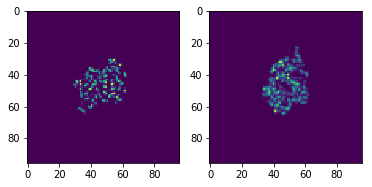

In [143]:
plt.figure()
plt.subplot(121)
plt.imshow(molecules[0,45,...,0])
plt.subplot(122)
plt.imshow(rot_im[0,45,...,0])

In [144]:
print(theta[0,...])

[[ 0.62366103 -0.78168705 -0.0035041   0.        ]
 [-0.64708928 -0.51374832 -0.56332772  0.        ]
 [ 0.43854576  0.35359301 -0.82622612  0.        ]]


In [145]:
# The tensorflow rotation methods

In [158]:
image_feed = tf.placeholder(shape=(None, 96,96,96 ,1), dtype=tf.float32)
reference_feed = tf.placeholder(shape=(None, 96,96,96 ,1), dtype=tf.float32)

if 1:
    k = 16
    image = tf.layers.average_pooling3d(image_feed, k, k)
    reference = tf.layers.average_pooling3d(reference_feed, k, k)

In [159]:
basis_exp = tf.Variable(np.zeros(shape=(3,3)))
skew_exp = basis_exp - tf.transpose(basis_exp)
rotation = tf.linalg.expm(skew_exp)
translation = tf.Variable(np.zeros(shape=(3,1)))
theta = tf.concat([rotation, translation], axis=-1)

In [160]:
rot_image = tensorflow_rotations.rot3d(image, theta)

In [161]:
loss = tf.reduce_mean(tf.square(rot_image-reference))

In [162]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-2).minimize(loss)
tf.global_variables_initializer().run()

In [163]:
for i in range(100000):
    _, l, matrix = sess.run([optimizer, loss, rotation], feed_dict={image_feed: molecules, reference_feed: rot_im})
    if i%100==0:
        print(l)
        print(matrix)

0.00402409
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
0.000926632
[[ 0.94219344 -0.31774065  0.10635973]
 [ 0.31113526  0.94746072  0.07424976]
 [-0.12436383 -0.03686538  0.9915516 ]]
0.000926437
[[ 0.94168877 -0.31894075  0.10723369]
 [ 0.31252008  0.94713425  0.07258039]
 [-0.12471355 -0.03483546  0.99158107]]
0.000926441
[[ 0.94158471 -0.31922859  0.1072909 ]
 [ 0.31279439  0.94703567  0.07268504]
 [-0.12481145 -0.03487913  0.99156722]]
0.000926445
[[ 0.94164976 -0.31901891  0.10734364]
 [ 0.31263421  0.94712053  0.07226731]
 [-0.12472201 -0.0344912   0.99159204]]
0.000926448
[[ 0.94164521 -0.31903019  0.10735009]
 [ 0.31265704  0.9471201   0.0721741 ]
 [-0.12469914 -0.03439863  0.99159813]]
0.000926444
[[ 0.94165077 -0.31901136  0.10735728]
 [ 0.31262269  0.94712224  0.07229466]
 [-0.12474329 -0.034514    0.99158857]]
0.000926453
[[ 0.9414245  -0.3197143   0.10725049]
 [ 0.31329549  0.94687681  0.0725965 ]
 [-0.12476314 -0.03474303  0.99157808]]
0.000926444
[[ 0.94164989 -0.3190

0.000926923
[[ 0.94152802 -0.31904658  0.10832481]
 [ 0.31236177  0.94704833  0.07436123]
 [-0.12631353 -0.03617665  0.99133049]]
0.000926923
[[ 0.94152884 -0.3190433   0.10832734]
 [ 0.31235875  0.94704955  0.07435838]
 [-0.1263149  -0.03617357  0.99133043]]
0.000926923
[[ 0.94152996 -0.3190392   0.10832969]
 [ 0.31235486  0.94705103  0.07435584]
 [-0.12631617 -0.03617094  0.99133036]]
0.000926923
[[ 0.94153097 -0.31903574  0.10833107]
 [ 0.31235162  0.94705228  0.07435355]
 [-0.12631663 -0.03616879  0.99133038]]
0.000926923
[[ 0.94153168 -0.31903297  0.10833314]
 [ 0.31234903  0.9470533   0.07435144]
 [-0.12631782 -0.03616649  0.99133032]]
0.000926924
[[ 0.94153248 -0.31903023  0.10833426]
 [ 0.31234646  0.94705429  0.07434964]
 [-0.1263182  -0.03616478  0.99133033]]
0.000926924
[[ 0.94153309 -0.31902786  0.10833588]
 [ 0.31234423  0.94705516  0.07434788]
 [-0.1263191  -0.03616291  0.99133028]]
0.000926923
[[ 0.94153385 -0.31902521  0.10833712]
 [ 0.3123417   0.9470561   0.07434656]


0.000926925
[[ 0.94153919 -0.31900607  0.10834703]
 [ 0.31232365  0.94706302  0.07433423]
 [-0.12632454 -0.03614925  0.99133009]]
0.000926925
[[ 0.94153922 -0.31900592  0.10834723]
 [ 0.31232349  0.94706307  0.07433422]
 [-0.12632472 -0.0361492   0.99133007]]
0.000926925
[[ 0.94153917 -0.31900613  0.10834701]
 [ 0.31232373  0.947063    0.07433412]
 [-0.12632449 -0.03614915  0.9913301 ]]
0.000926925
[[ 0.94153911 -0.31900634  0.10834696]
 [ 0.31232391  0.94706292  0.07433431]
 [-0.1263245  -0.03614932  0.99133009]]
0.000926925
[[ 0.94153919 -0.31900604  0.1083471 ]
 [ 0.31232361  0.94706303  0.07433422]
 [-0.1263246  -0.03614923  0.99133008]]
0.000926925
[[ 0.94153932 -0.31900572  0.1083469 ]
 [ 0.31232329  0.94706313  0.07433436]
 [-0.12632444 -0.03614946  0.99133009]]
0.000926925
[[ 0.94153907 -0.3190064   0.10834707]
 [ 0.31232395  0.9470629   0.07433455]
 [-0.12632468 -0.0361495   0.99133006]]
0.000926925
[[ 0.94153922 -0.31900602  0.10834691]
 [ 0.31232362  0.94706304  0.07433412]


0.000926925
[[ 0.94153917 -0.31900608  0.10834714]
 [ 0.31232368  0.94706302  0.07433407]
 [-0.12632459 -0.03614906  0.99133009]]
0.000926924
[[ 0.94153914 -0.31900618  0.10834712]
 [ 0.31232375  0.94706298  0.07433432]
 [-0.12632466 -0.03614929  0.99133007]]
0.000926925
[[ 0.94153919 -0.31900608  0.10834703]
 [ 0.31232367  0.94706301  0.07433423]
 [-0.12632454 -0.03614925  0.99133009]]
0.000926925
[[ 0.94153902 -0.31900654  0.10834713]
 [ 0.3123241   0.94706286  0.07433439]
 [-0.1263247  -0.03614931  0.99133006]]
0.000926925
[[ 0.94153913 -0.31900615  0.1083473 ]
 [ 0.31232371  0.94706299  0.07433435]
 [-0.12632483 -0.03614927  0.99133005]]
0.000926925
[[ 0.94153925 -0.31900587  0.10834713]
 [ 0.31232346  0.94706309  0.07433417]
 [-0.1263246  -0.03614919  0.99133008]]
0.000926925
[[ 0.94153923 -0.3190059   0.10834722]
 [ 0.3123235   0.94706308  0.07433401]
 [-0.12632464 -0.03614901  0.99133008]]
0.000926925
[[ 0.94153922 -0.31900594  0.10834716]
 [ 0.31232354  0.94706307  0.07433398]


0.000926924
[[ 0.941539   -0.31900647  0.10834749]
 [ 0.312324    0.94706288  0.07433447]
 [-0.12632506 -0.03614928  0.99133002]]
0.000926925
[[ 0.94153917 -0.31900607  0.10834723]
 [ 0.31232363  0.94706301  0.07433434]
 [-0.12632476 -0.03614929  0.99133006]]
0.000926925
[[ 0.94153907 -0.31900638  0.10834715]
 [ 0.31232396  0.94706291  0.07433424]
 [-0.12632466 -0.03614918  0.99133007]]
0.000926926
[[ 0.94153912 -0.31900628  0.10834699]
 [ 0.31232385  0.94706294  0.07433432]
 [-0.12632454 -0.03614932  0.99133009]]
0.000926925
[[ 0.94153916 -0.31900613  0.10834715]
 [ 0.3123237   0.947063    0.07433431]
 [-0.12632468 -0.03614928  0.99133007]]
0.000926925
[[ 0.94153914 -0.31900614  0.10834723]
 [ 0.3123237   0.94706299  0.07433433]
 [-0.12632476 -0.03614928  0.99133006]]
0.000926925
[[ 0.94153914 -0.31900617  0.10834719]
 [ 0.31232372  0.94706298  0.07433444]
 [-0.12632476 -0.03614939  0.99133005]]
0.000926925
[[ 0.94153913 -0.31900627  0.10834696]
 [ 0.31232382  0.94706294  0.07433446]


0.000926925
[[ 0.94153919 -0.31900618  0.10834676]
 [ 0.31232377  0.94706298  0.07433427]
 [-0.12632429 -0.03614936  0.99133011]]
0.000926925
[[ 0.94153908 -0.31900633  0.10834722]
 [ 0.31232392  0.94706294  0.07433412]
 [-0.12632469 -0.03614905  0.99133008]]
0.000926925
[[ 0.94153914 -0.31900629  0.10834685]
 [ 0.31232389  0.94706295  0.07433415]
 [-0.12632434 -0.0361492   0.99133011]]
0.000926925
[[ 0.94153915 -0.31900623  0.10834695]
 [ 0.31232381  0.94706296  0.0743343 ]
 [-0.12632449 -0.03614932  0.99133009]]
0.000926925
[[ 0.94153907 -0.31900642  0.10834708]
 [ 0.31232397  0.94706289  0.07433446]
 [-0.12632467 -0.03614941  0.99133006]]
0.000926925
[[ 0.94153927 -0.31900586  0.10834695]
 [ 0.31232344  0.94706309  0.07433425]
 [-0.12632445 -0.03614932  0.9913301 ]]
0.000926925
[[ 0.94153901 -0.31900662  0.10834697]
 [ 0.3123242   0.94706283  0.07433429]
 [-0.12632452 -0.03614926  0.99133009]]
0.000926925
[[ 0.94153909 -0.31900632  0.10834716]
 [ 0.31232391  0.94706294  0.07433417]


0.000926924
[[ 0.94153908 -0.31900632  0.10834724]
 [ 0.31232387  0.94706293  0.0743344 ]
 [-0.12632479 -0.03614931  0.99133005]]
0.000926926
[[ 0.94153925 -0.31900589  0.10834707]
 [ 0.31232345  0.94706307  0.07433433]
 [-0.1263246  -0.03614935  0.99133008]]
0.000926925
[[ 0.94153913 -0.31900628  0.10834697]
 [ 0.31232384  0.94706294  0.07433442]
 [-0.12632455 -0.03614942  0.99133008]]
0.000926925
[[ 0.94153918 -0.31900611  0.10834704]
 [ 0.31232366  0.947063    0.07433446]
 [-0.12632462 -0.03614947  0.99133007]]
0.000926925
[[ 0.94153927 -0.31900589  0.10834688]
 [ 0.31232347  0.94706307  0.07433429]
 [-0.12632441 -0.03614938  0.9913301 ]]
0.000926925
[[ 0.9415393  -0.31900572  0.10834712]
 [ 0.31232333  0.94706314  0.07433402]
 [-0.12632454 -0.03614907  0.99133009]]
0.000926925
[[ 0.94153907 -0.31900637  0.10834717]
 [ 0.3123239   0.94706291  0.07433455]
 [-0.12632478 -0.03614947  0.99133005]]
0.000926925
[[ 0.94153917 -0.31900616  0.10834691]
 [ 0.31232376  0.94706299  0.07433417]


0.000926925
[[ 0.94153916 -0.31900615  0.10834709]
 [ 0.31232373  0.94706299  0.07433418]
 [-0.12632458 -0.03614917  0.99133008]]
0.000926925
[[ 0.94153911 -0.31900626  0.10834714]
 [ 0.31232382  0.94706295  0.07433435]
 [-0.12632469 -0.03614931  0.99133007]]
0.000926924
[[ 0.9415391  -0.31900624  0.10834736]
 [ 0.3123238   0.94706296  0.07433426]
 [-0.12632486 -0.03614916  0.99133005]]
0.000926925
[[ 0.94153931 -0.31900558  0.1083474 ]
 [ 0.31232317  0.94706319  0.07433403]
 [-0.1263248  -0.03614901  0.99133006]]
0.000926924
[[ 0.94153909 -0.31900633  0.10834709]
 [ 0.31232391  0.94706293  0.07433425]
 [-0.12632461 -0.03614921  0.99133008]]
0.000926925
[[ 0.94153918 -0.31900615  0.10834689]
 [ 0.31232374  0.94706299  0.07433423]
 [-0.12632441 -0.03614928  0.9913301 ]]
0.000926926
[[ 0.9415391  -0.31900638  0.10834688]
 [ 0.31232395  0.94706291  0.07433439]
 [-0.12632445 -0.03614941  0.99133009]]
0.000926925
[[ 0.94153918 -0.31900619  0.10834679]
 [ 0.31232374  0.94706296  0.07433459]


0.000926925
[[ 0.94153912 -0.31900628  0.10834705]
 [ 0.31232384  0.94706294  0.07433436]
 [-0.1263246  -0.03614934  0.99133008]]
0.000926925
[[ 0.94153918 -0.3190061   0.10834704]
 [ 0.31232366  0.947063    0.07433438]
 [-0.12632459 -0.03614939  0.99133008]]
0.000926925
[[ 0.94153924 -0.31900588  0.10834712]
 [ 0.31232346  0.94706308  0.07433424]
 [-0.12632462 -0.03614925  0.99133008]]
0.000926925
[[ 0.94153911 -0.31900623  0.10834722]
 [ 0.31232378  0.94706296  0.07433444]
 [-0.12632478 -0.03614937  0.99133005]]
0.000926925
[[ 0.9415393  -0.31900567  0.1083473 ]
 [ 0.31232328  0.94706316  0.07433394]
 [-0.12632469 -0.03614895  0.99133008]]
0.000926925
[[ 0.9415391  -0.31900626  0.10834722]
 [ 0.31232382  0.94706295  0.07433433]
 [-0.12632475 -0.03614927  0.99133006]]
0.000926925
[[ 0.94153922 -0.319006    0.10834699]
 [ 0.31232357  0.94706303  0.07433434]
 [-0.12632453 -0.03614938  0.99133008]]
0.000926925
[[ 0.94153917 -0.31900595  0.10834758]
 [ 0.31232348  0.94706305  0.07433448]


0.000926925
[[ 0.94153919 -0.31900607  0.10834706]
 [ 0.31232362  0.94706301  0.07433447]
 [-0.12632464 -0.03614947  0.99133007]]
0.000926925
[[ 0.9415391  -0.31900622  0.10834742]
 [ 0.31232378  0.94706297  0.07433425]
 [-0.12632492 -0.03614913  0.99133004]]
0.000926925
[[ 0.94153921 -0.319006    0.10834708]
 [ 0.31232356  0.94706303  0.0743344 ]
 [-0.12632464 -0.0361494   0.99133007]]
0.000926925
[[ 0.94153918 -0.31900609  0.10834707]
 [ 0.31232366  0.94706301  0.07433427]
 [-0.12632458 -0.03614927  0.99133008]]
0.000926925
[[ 0.94153907 -0.31900631  0.10834735]
 [ 0.31232388  0.94706294  0.07433424]
 [-0.12632485 -0.03614913  0.99133005]]
0.000926925
[[ 0.94153916 -0.31900613  0.10834713]
 [ 0.31232369  0.94706299  0.07433439]
 [-0.12632469 -0.03614937  0.99133006]]
0.000926924
[[ 0.94153909 -0.31900632  0.10834717]
 [ 0.31232389  0.94706293  0.07433434]
 [-0.12632471 -0.03614927  0.99133006]]
0.000926925
[[ 0.94153912 -0.31900623  0.10834718]
 [ 0.31232379  0.94706296  0.07433443]


0.000926925
[[ 0.94153922 -0.31900592  0.10834724]
 [ 0.3123235   0.94706307  0.07433417]
 [-0.12632471 -0.03614914  0.99133007]]
0.000926925
[[ 0.94153916 -0.31900612  0.10834714]
 [ 0.3123237   0.947063    0.07433426]
 [-0.12632465 -0.03614923  0.99133007]]
0.000926924
[[ 0.94153911 -0.31900632  0.10834697]
 [ 0.31232388  0.94706293  0.07433446]
 [-0.12632456 -0.03614946  0.99133008]]
0.000926925
[[ 0.94153915 -0.31900614  0.10834716]
 [ 0.31232372  0.947063    0.07433423]
 [-0.12632467 -0.0361492   0.99133007]]
0.000926925
[[ 0.94153924 -0.31900584  0.10834728]
 [ 0.31232344  0.9470631   0.07433403]
 [-0.12632471 -0.03614901  0.99133008]]
0.000926925
[[ 0.94153929 -0.31900575  0.1083471 ]
 [ 0.31232333  0.94706313  0.0743342 ]
 [-0.12632458 -0.03614924  0.99133008]]
0.000926926
[[ 0.94153923 -0.319006    0.10834686]
 [ 0.3123236   0.94706304  0.07433411]
 [-0.12632433 -0.0361492   0.99133012]]
0.000926925
[[ 0.94153917 -0.31900605  0.10834724]
 [ 0.31232362  0.94706303  0.07433423]


0.000926924
[[ 0.94153925 -0.31900592  0.10834697]
 [ 0.31232353  0.94706307  0.07433403]
 [-0.12632441 -0.0361491   0.99133011]]
0.000926925
[[ 0.94153921 -0.31900606  0.10834688]
 [ 0.31232364  0.94706302  0.07433422]
 [-0.12632439 -0.03614929  0.9913301 ]]
0.000926925
[[ 0.94153921 -0.31900607  0.10834689]
 [ 0.31232364  0.94706301  0.07433441]
 [-0.12632446 -0.03614947  0.99133009]]
0.000926925
[[ 0.94153919 -0.31900596  0.10834737]
 [ 0.31232355  0.94706307  0.074334  ]
 [-0.12632478 -0.03614894  0.99133007]]
0.000926925
[[ 0.94153923 -0.31900597  0.10834702]
 [ 0.31232358  0.94706306  0.07433401]
 [-0.12632445 -0.03614905  0.99133011]]
0.000926925
[[ 0.94153905 -0.31900653  0.10834691]
 [ 0.3123241   0.94706286  0.0743343 ]
 [-0.12632446 -0.0361493   0.9913301 ]]
0.000926925
[[ 0.94153926 -0.31900591  0.10834695]
 [ 0.31232348  0.94706307  0.07433433]
 [-0.12632449 -0.03614939  0.99133009]]
0.000926925
[[ 0.94153916 -0.31900611  0.10834718]
 [ 0.31232367  0.947063    0.07433433]


0.000926925
[[ 0.94153925 -0.31900602  0.10834671]
 [ 0.31232361  0.94706303  0.07433425]
 [-0.12632424 -0.03614938  0.99133012]]
0.000926925
[[ 0.94153914 -0.31900616  0.10834723]
 [ 0.31232372  0.94706299  0.07433435]
 [-0.12632477 -0.03614929  0.99133006]]
0.000926924
[[ 0.94153909 -0.31900637  0.10834707]
 [ 0.31232394  0.94706292  0.07433428]
 [-0.12632461 -0.03614925  0.99133008]]
0.000926925
[[ 0.94153923 -0.31900583  0.10834737]
 [ 0.31232339  0.9470631   0.07433427]
 [-0.12632486 -0.03614921  0.99133005]]
0.000926925
[[ 0.94153916 -0.31900617  0.10834697]
 [ 0.31232373  0.94706298  0.07433442]
 [-0.12632455 -0.03614943  0.99133008]]
0.000926925
[[ 0.94153916 -0.31900617  0.10834702]
 [ 0.31232375  0.94706298  0.07433427]
 [-0.12632454 -0.03614928  0.99133009]]
0.000926926
[[ 0.94153906 -0.3190065   0.10834692]
 [ 0.31232409  0.94706287  0.07433427]
 [-0.12632446 -0.03614927  0.9913301 ]]
0.000926925
[[ 0.94153921 -0.31900594  0.10834727]
 [ 0.31232349  0.94706306  0.07433435]


0.000926925
[[ 0.94153909 -0.31900645  0.10834676]
 [ 0.31232402  0.94706288  0.07433441]
 [-0.12632435 -0.03614945  0.9913301 ]]
0.000926925
[[ 0.94153911 -0.3190063   0.10834701]
 [ 0.31232386  0.94706293  0.07433445]
 [-0.12632459 -0.03614944  0.99133007]]
0.000926925
[[ 0.94153912 -0.3190063   0.10834703]
 [ 0.31232386  0.94706294  0.07433437]
 [-0.12632459 -0.03614935  0.99133008]]
0.000926925
[[ 0.94153922 -0.31900595  0.10834712]
 [ 0.3123235   0.94706305  0.0743344 ]
 [-0.12632467 -0.0361494   0.99133007]]
0.000926925
[[ 0.94153934 -0.31900562  0.10834709]
 [ 0.31232319  0.94706317  0.07433426]
 [-0.12632459 -0.03614932  0.99133008]]
0.000926925
[[ 0.94153915 -0.31900618  0.10834705]
 [ 0.31232373  0.94706297  0.07433446]
 [-0.12632464 -0.03614945  0.99133007]]
0.000926925
[[ 0.9415392  -0.31900605  0.10834699]
 [ 0.31232364  0.94706303  0.07433418]
 [-0.12632448 -0.03614922  0.9913301 ]]
0.000926925
[[ 0.9415392  -0.319006    0.10834716]
 [ 0.31232357  0.94706304  0.07433432]


0.000926924
[[ 0.94153917 -0.31900606  0.10834721]
 [ 0.31232363  0.94706302  0.07433432]
 [-0.12632473 -0.03614928  0.99133006]]
0.000926925
[[ 0.94153913 -0.31900623  0.10834709]
 [ 0.31232382  0.94706297  0.07433418]
 [-0.12632458 -0.03614916  0.99133009]]
0.000926925
[[ 0.94153918 -0.31900608  0.10834707]
 [ 0.31232365  0.94706301  0.0743343 ]
 [-0.1263246  -0.0361493   0.99133008]]
0.000926925
[[ 0.94153905 -0.31900653  0.10834692]
 [ 0.31232409  0.94706285  0.07433448]
 [-0.12632452 -0.03614946  0.99133008]]
0.000926925
[[ 0.94153922 -0.31900589  0.10834731]
 [ 0.3123235   0.94706309  0.07433394]
 [-0.1263247  -0.03614891  0.99133008]]
0.000926925
[[ 0.94153909 -0.31900637  0.10834705]
 [ 0.31232394  0.94706291  0.07433434]
 [-0.1263246  -0.0361493   0.99133008]]
0.000926925
[[ 0.94153918 -0.31900611  0.10834702]
 [ 0.31232367  0.947063    0.07433437]
 [-0.12632457 -0.03614939  0.99133008]]
0.000926925
[[ 0.94153932 -0.31900564  0.10834715]
 [ 0.31232324  0.94706317  0.07433405]


0.000926926
[[ 0.94153925 -0.3190058   0.1083473 ]
 [ 0.31232338  0.94706311  0.0743342 ]
 [-0.12632477 -0.03614918  0.99133006]]
0.000926925
[[ 0.9415392  -0.31900607  0.10834699]
 [ 0.31232368  0.94706303  0.07433402]
 [-0.12632443 -0.03614906  0.99133011]]
0.000926925
[[ 0.94153909 -0.31900624  0.10834736]
 [ 0.3123238   0.94706296  0.07433433]
 [-0.12632489 -0.03614922  0.99133004]]
0.000926925
[[ 0.94153915 -0.31900623  0.10834695]
 [ 0.3123238   0.94706296  0.07433428]
 [-0.12632448 -0.0361493   0.99133009]]
0.000926925
[[ 0.94153912 -0.31900625  0.1083471 ]
 [ 0.31232382  0.94706296  0.07433426]
 [-0.12632461 -0.03614923  0.99133008]]
0.000926925
[[ 0.9415392  -0.31900608  0.10834689]
 [ 0.31232367  0.94706302  0.07433415]
 [-0.12632438 -0.03614922  0.99133011]]
0.000926925
[[ 0.94153921 -0.31900591  0.10834732]
 [ 0.31232347  0.94706307  0.0743343 ]
 [-0.12632483 -0.03614925  0.99133005]]
0.000926925
[[ 0.94153911 -0.3190063   0.10834706]
 [ 0.31232386  0.94706294  0.07433433]


In [ ]:
im1, im2 = sess.run([reference,rot_image], feed_dict={image_feed: molecules, reference_feed: rot_im})

In [ ]:
plt.figure()
plt.subplot(121)
plt.imshow(im1[0,7,...,0])
plt.subplot(122)
plt.imshow(im2[0,7,...,0])